# DAY 2: Models - Exercise 2.
In this excersice we will be: <br>
1. Using measures from Exercise 1 to charecterise the ECMWF model climatology.
2. Calculate the mean and terciles of the model climatology for OND, Kenya
3. Calculate the model bias relative to CHRIPS observations
4. Calculate the ensemble mean prediction for each year
5. Calculate the correlation of the ensemble mean predictions with CHIRPS observations.<br>

The data for this excersise is below - it's a little more complicated than last time! <br>
However, it is the same principle. For each year, and each ensemble member <br>
a forecasted amount of rainfall is given for the months OND. 

Below inside the '' after the location(, enter the location you're in with _Hindcast and _Obs_Chirps after it. <br>
It should be in the same format as the Kenya version which is already written. <br>
If stuck, Kenya can be used just fine. 

In [2]:
import numpy as np
import xarray as xr
from Data import location
da = location('Sudan_Hindcast')
obs = location('Sudan_Obs_Chirps')
# Example: access rainfall for year=1994, member='Member 2'

print("Rainfall for 1996, Member 14:", da.sel(year=1996, member="Member 14").item())
print("Rainfall for 1996, Observed", obs[4])

Rainfall for 1996, Member 14: 0.19
Rainfall for 1996, Observed 0.3


## Climate Mean 
Like before we will start with figuring out the climate mean. <br>
The data is from the source ECMWF. <br>
So the climate mean is representative of the forecasted rainfall per day in OND over Kenya.

In [3]:
#Like before we calculate the mean. 
#It is slightly diffrent to last time. 
ECMWF_Climate_Mean =  da.mean().item() # instead of np we use da to represent the dataset
#.item forces it to display just the overall awnswer
print("Climate_Mean = ",ECMWF_Climate_Mean, "mm/day")

Climate_Mean =  0.21900000000000006 mm/day


## Observed rainfall
Now we must bring in the oberserved rainfall for OND <br>
This array reprsents the seen average rainfall for the region per day selected in the same years as the hindcast.


In [4]:
Obs_Rain = obs
print(Obs_Rain)

[0.16, 0.19, 0.18, 0.15, 0.3, 0.24, 0.33, 0.21, 0.14, 0.22, 0.18, 0.14, 0.1, 0.25, 0.13, 0.11, 0.1, 0.25, 0.15, 0.23, 0.08, 0.21, 0.25, 0.13]


Now we need the mean for the Observed rainfall <br>
replace the inside of the bracket with the correct variable. <br>
Hint - See Ex 1 for np.mean if stuck

<details>
  <summary>Click for solution!</summary>
  
Obs_mean= np.mean(Obs_Rain)
</details>

In [5]:
Obs_Mean = np.mean()
print("The Observed Climate Mean =", Obs_Mean, "mm/day")

The Observed Climate Mean = 0.18458333333333332 mm/day


## Bias Correction
The next step is to calculate the bias <br>
To do this we need to subtract the Observed Climate mean from the ECMWF Climate Mean. <br>
This is to say the forecast system is biased by a certain amount on average to the observed data.<br>
For example it might be always forecasting warmer than it actually is. <br>
This is the bias of the forecast.<br>
If the model is forecasting higher mm/day than the obs this would be a wet bias. It would create a **positve output**. <br>
**Fill in the correct brackets with these options: ECMWF_Climate_Mean, Obs_Mean.**


<details>
  <summary>Click for solution!</summary>
  
Bias = (ECMWF_Climate_Mean) - (Obs_Mean)
</details>

In [6]:
Bias = () - ()

print("This is the Bias:", Bias)

This is the Bias: 0.034416666666666734


## Terciles
Next we calculate the terciles!<br>
We did this in Ex 1. <br>
**Fill in the appropriate spot inside the brackets with : da** <br>
**Hint: This is the same spot RFA was in Ex 1**


<details>
  <summary>Click for solution!</summary>
RF_upper = np.percentile(da, 66.66666)<br>
RF_lower = np.percentile(da, 33.33333)
</details>

In [7]:
RF_upper = np.percentile( , 66.66666)
RF_lower = np.percentile( , 33.33333)

print("The upper tercile determiner is:", RF_upper)
print("This lower tercile determiner is:", RF_lower)

The upper tercile determiner is: 0.24
This lower tercile determiner is: 0.18


We can now repeat this for the observed rainfall

In [15]:
RF_upper_Obs = np.percentile(Obs_Rain, 66.66666)
RF_lower_Obs = np.percentile(Obs_Rain, 33.33333)


print("The upper tercile determiner for observed is:", RF_upper_Obs)
print("This lower tercile determiner for observed is:", RF_lower_Obs)

The upper tercile determiner for observed is: 0.21333331799999997
This lower tercile determiner for observed is: 0.14666665899999998


## Mean per year
Now we need to create a dataset that has the forecast mean for each year. <br>
For each year there is 15 predictions of the daily average rainfall for OND from ECMWF. <br>
So for each year we need to add up the 15 predictions and divide by 15. <br>
To do this we will rely on some python shortcuts.

In [8]:
#First we create an empty array to store the data in
Yearly_Forecast_mean = []

#Then we need to select for each year all the values accosiated with it
for year in da.year.values:
    data = da.sel(year=year)
    #now we can use the function mean to return the yearly mean across the members 
    mean = data.mean().item()
    #Now we can store them into the list
    Yearly_Forecast_mean.append(mean)
    #print(f"{year}: {round(mean, 2)}")

#Finally we round the values in the list for easy readability 
Yearly_Forecast_mean = np.round(Yearly_Forecast_mean,2)
print("Yearly_Forecast_mean for 1993-2016:",Yearly_Forecast_mean)

    

Yearly_Forecast_mean for 1993-2016: [0.17 0.25 0.2  0.18 0.28 0.21 0.24 0.21 0.2  0.21 0.21 0.2  0.23 0.24
 0.25 0.19 0.19 0.27 0.23 0.22 0.24 0.2  0.24 0.18]


## Standard Deviation
Like in Ex1, we now need to caculate the standard deviation of the yearly forecast means' <br>
**Fill in the appropriate variable in the bracket and std after the "np.std(" but before the ,**<br>
You are looking for the name of the **array** that represents the observed values. 

<details>
  <summary>Click for solution!</summary>
Standard_deviation_Obs = np.std(Obs_Rain , ddof=1)
</details>

In [13]:
Standard_deviation = np.std(Yearly_Forecast_mean, ddof=1)
Standard_deviation_Obs = np.std( , ddof=1)

print("This is the standard deviation for the model:", Standard_deviation)
print("This is the standard deviation for the observed:", Standard_deviation_Obs)

This is the standard deviation for the model: 0.028842400350369845
This is the standard deviation for the observed: 0.06553984295444072


## Correlation Coeffecient 
Next up is to find the value for the Correlation Coeffecient.<br>
This is a measure of how close a set of values is to another set. <br>
We need to see how close the observed rainfall each year is to the forecasted mean of that year. <br>
This tells us if the forecast is generally predicting close to the correct rainfall. <br>
In practice we need to compare the Yearly_Forecast_mean dataset and the Obs_Rain dataset.<br>
The closer the **Correlation_Coeffecient is to 1** - the better the forecasts' skill.<br>
<br>
**Put the correct variables inside the bracket, seperated by the comma.**<br>
Options include: Yearly_Forecast_mean, Standard_deviation, Bias and Obs_Rain

<details>
  <summary>Click for solution!</summary>
Correlation_Coeffecient = np.corrcoef(Yearly_Forecast_mean,Obs_Rain)[0,1]
</details>

In [10]:
Correlation_Coeffecient = np.corrcoef( , )[0,1]
print("The Correlation_Coeffecient is:", Correlation_Coeffecient)

The Correlation_Coeffecient is: 0.4780249556248702


## Plotting
We can now assemble a plot. <br>
We want to compare the Yearly Forecast Mean - as this was the given forecast for rainfall per day in OND - Kenya. <br>
With the yearly Observed Rainfall per day in OND - Kenya. <br>
This is the Yearly_Forecast_mean dataset and the Obs_Rain dataset. <br>
The plot will show the years on the x-axis against the average mm of rainfall per day in OND on the y-axis. <br>
<br>
If the forecast was 100% correct then the two plotted lines would match up perfectly. <br>
The further appart the lines - the more the forecast was out. 


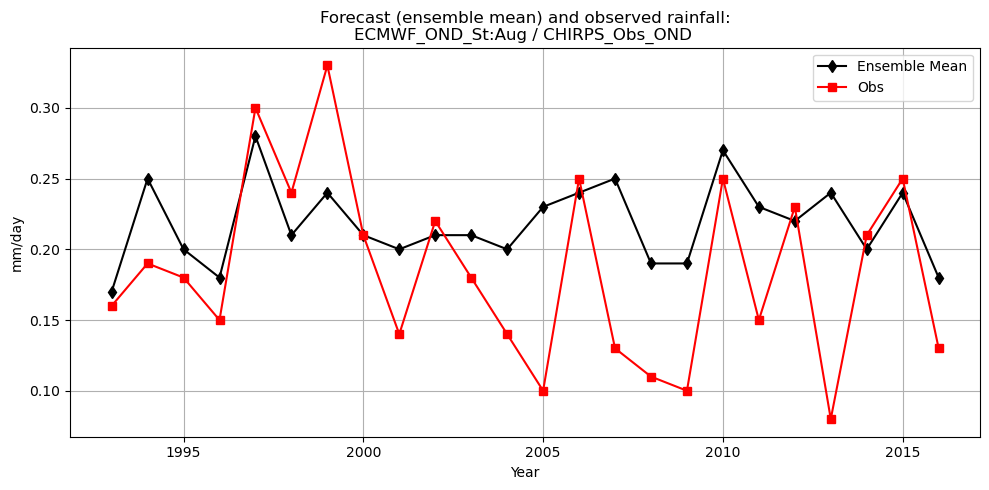

In [10]:
import matplotlib.pyplot as plt


years = list(range(1993, 2017))
mean_forecast_rainfall = Yearly_Forecast_mean
mean_observed_rainfall = Obs_Rain

plt.figure(figsize=(10, 5))

# Plot forecast rainfall
plt.plot(
    years,
    mean_forecast_rainfall,
    linestyle='-',
    marker='d',
    color='black',
    label='Ensemble Mean'
)

# Plot observed rainfall
plt.plot(
    years,
    mean_observed_rainfall,
    linestyle='-',
    marker='s',
    color='red',
    label='Obs'
)

# Labels and title
plt.xlabel('Year')
plt.ylabel('mm/day')
plt.title(
    'Forecast (ensemble mean) and observed rainfall:\n'
    'ECMWF_OND_St:Aug / CHIRPS_Obs_OND '
) #/ Reg. Kenya: \n''6N-5S;33-42E Bias=0.33/Corr=0.85'

# Legend and grid
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# You have now finished EX 2; Please refer to the powerpoint on what to do next. 
## Copy the image of the plot into the powerpoint 